In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load cleaned dataset from Task 1
df = pd.read_csv('cleaned_data.csv')

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (1399, 242)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Foundation_Slab,Foundation_Stone,Foundation_Wood,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,LandSlope_Mod,LandSlope_Sev,Street_Pave
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,2,...,False,False,False,False,False,False,False,False,False,True
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,3,...,False,False,False,False,False,False,False,False,False,True
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,2,...,False,False,False,False,False,False,False,False,False,True
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,3,...,False,False,False,False,False,False,False,False,False,True
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,2,...,False,False,False,False,False,False,False,False,False,True


In [11]:
# For simple linear regression, select one strong feature: 'GrLivArea'
X_simple = df[['GrLivArea']]
y = df['SalePrice']

# For multiple regression, select a few meaningful features (based on Task 2 correlation insights)
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'YearBuilt']
X_multiple = df[features]

# Train-test split (80% train, 20% test), fixed random state for reproducibility
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)
X_train_multi, X_test_multi, _, _ = train_test_split(X_multiple, y, test_size=0.2, random_state=42)


In [12]:
# Instantiate and train the model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# Predict on test set
y_pred_simple = model_simple.predict(X_test_simple)

# Evaluate
mae_simple = mean_absolute_error(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print(f"Simple Linear Regression Results:")
print(f"Feature: GrLivArea")
print(f"MAE: {mae_simple:,.2f}")
print(f"MSE: {mse_simple:,.2f}")
print(f"R^2 Score: {r2_simple:.4f}")

# Coefficient and intercept
print(f"Coefficient (slope): {model_simple.coef_[0]:.2f}")
print(f"Intercept: {model_simple.intercept_:.2f}")


Simple Linear Regression Results:
Feature: GrLivArea
MAE: 30,063.43
MSE: 1,657,255,036.95
R^2 Score: 0.4790
Coefficient (slope): 41786.40
Intercept: 174075.09


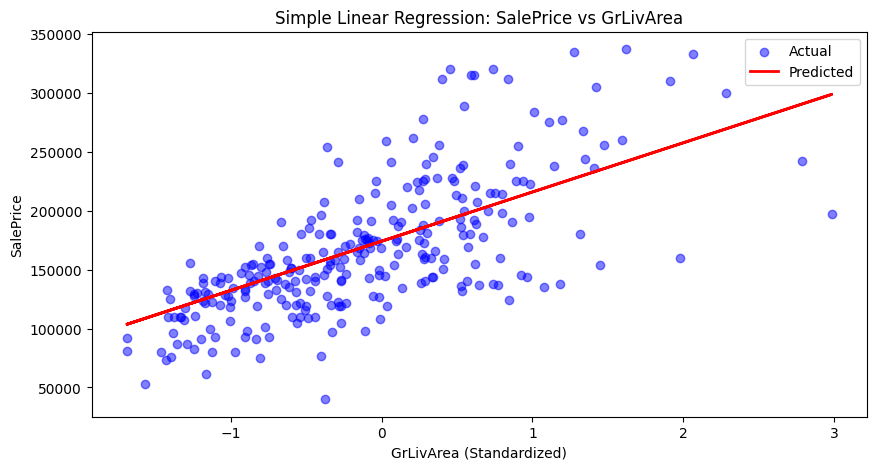

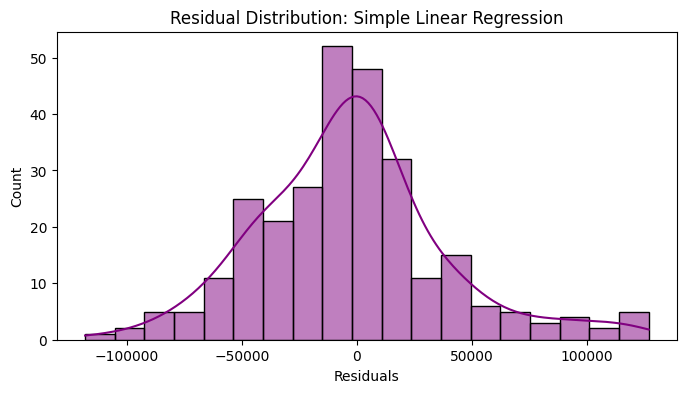

In [13]:
plt.figure(figsize=(10,5))

# Scatter plot of test data
plt.scatter(X_test_simple, y_test, color='blue', alpha=0.5, label='Actual')

# Regression line
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Predicted')

plt.xlabel('GrLivArea (Standardized)')
plt.ylabel('SalePrice')
plt.title('Simple Linear Regression: SalePrice vs GrLivArea')
plt.legend()
plt.show()

# Residual plot
residuals_simple = y_test - y_pred_simple
plt.figure(figsize=(8,4))
sns.histplot(residuals_simple, kde=True, color='purple')
plt.title('Residual Distribution: Simple Linear Regression')
plt.xlabel('Residuals')
plt.show()


In [14]:
# Instantiate and train the model
model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train)

# Predict on test set
y_pred_multi = model_multi.predict(X_test_multi)

# Evaluate
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"Multiple Linear Regression Results:")
print(f"Features: {features}")
print(f"MAE: {mae_multi:,.2f}")
print(f"MSE: {mse_multi:,.2f}")
print(f"R^2 Score: {r2_multi:.4f}")

# Coefficients and intercept
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model_multi.coef_})
print(coefficients)

print(f"Intercept: {model_multi.intercept_:.2f}")


Multiple Linear Regression Results:
Features: ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'YearBuilt']
MAE: 18,424.66
MSE: 624,067,081.48
R^2 Score: 0.8038
       Feature   Coefficient
0    GrLivArea  20221.984111
1  OverallQual  23378.403835
2  TotalBsmtSF   7406.607250
3   GarageCars   9644.678249
4    YearBuilt  11151.552347
Intercept: 175636.90


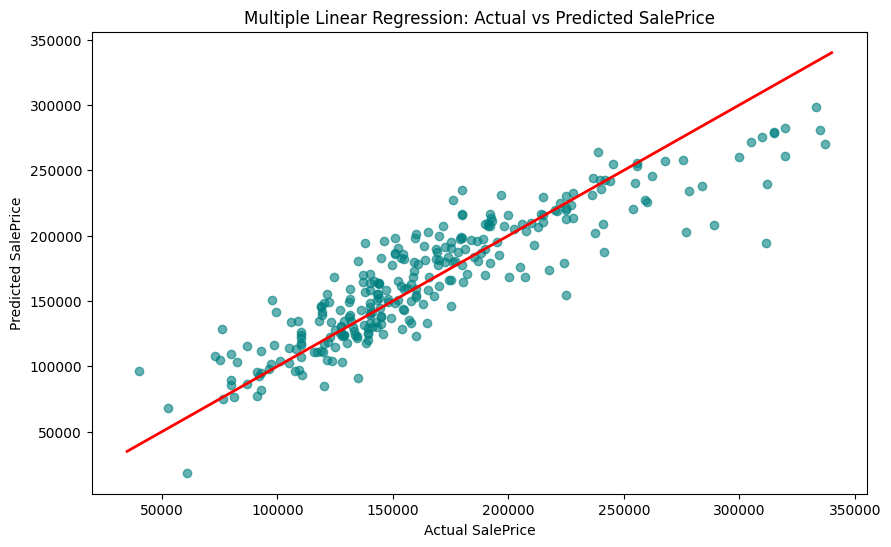

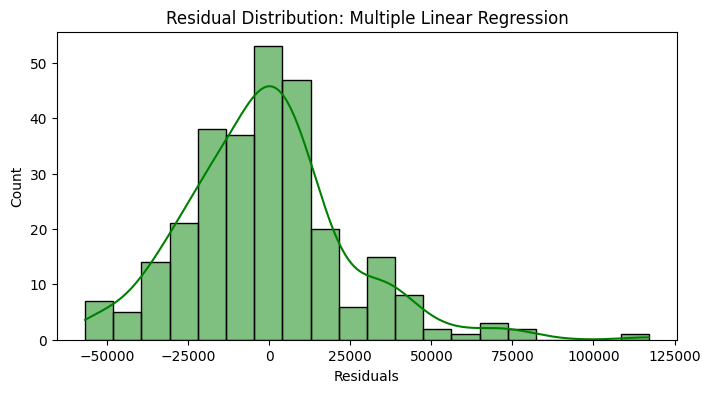

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_multi, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Diagonal line
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Multiple Linear Regression: Actual vs Predicted SalePrice')
plt.show()

# Residual plot for multiple regression
residuals_multi = y_test - y_pred_multi
plt.figure(figsize=(8,4))
sns.histplot(residuals_multi, kde=True, color='green')
plt.title('Residual Distribution: Multiple Linear Regression')
plt.xlabel('Residuals')
plt.show()


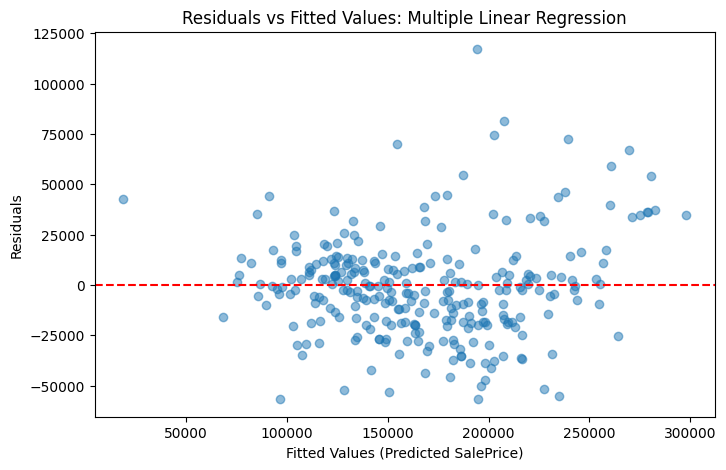

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred_multi, residuals_multi, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values (Predicted SalePrice)')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values: Multiple Linear Regression')
plt.show()
